# Convolutional Neural Network(CNN)


1.The Convolutional Neural Network (CNN or ConvNet) is a subtype of Neural Networks that is primarily utilised in applications for speech and image recognition. The high dimensionality of images is decreased without losing any information because to its built-in convolutional layer. Since this is the case, CNNs are particularly well suited for this use case.

2.In deep learning, there are different varieties of neural networks, but CNNs are the preferred network architecture for identifying and recognising objects. Because of this, they are ideal for computer vision (CV) tasks and for applications where accurate object recognition is crucial, like facial recognition and self-driving automobiles.

3.It has three layers namely

*   convolutional
*   pooling
*   fully connected layer





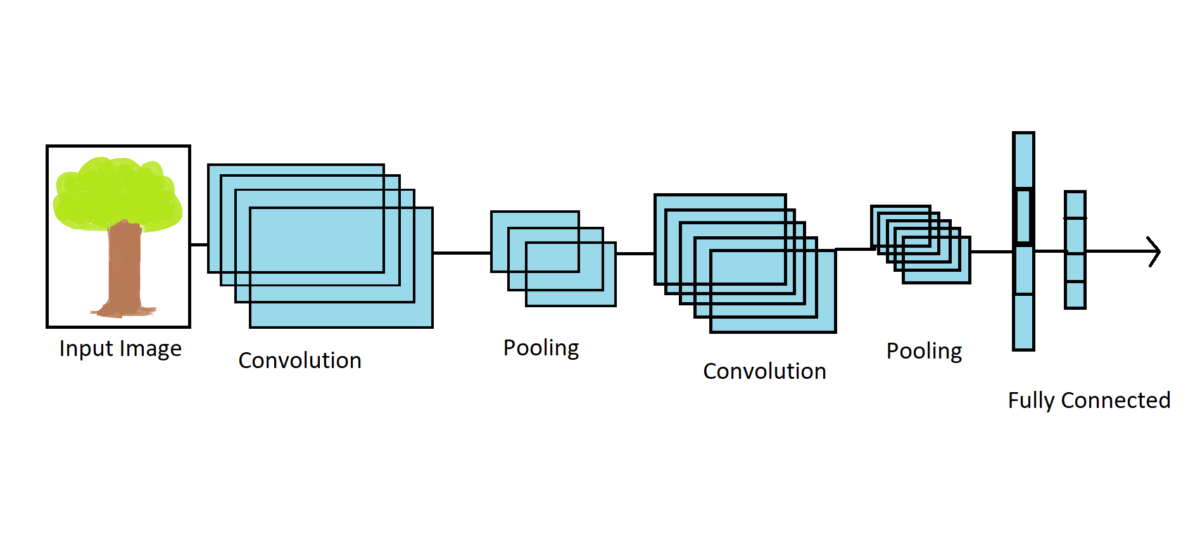

#Plant-seedling Classification

**Problem Statement:**
The target of this project is the classification of 12 different species of plants.As the data set consists of png images from 12 different species, we will use CNN to to classify the plants.CNN is widely
used in the field of computer vision for doing complicated tasks, hence we'll
be using it

# Code execution

## Importing Packages

We will be using keras and Tensorflow for CNN training


In [ ]:
import numpy as np # MATRIX OPERATIONS
import pandas as pd # EFFICIENT DATA STRUCTURES
import matplotlib.pyplot as plt # GRAPHING AND VISUALIZATIONS
import math # MATHEMATICAL OPERATIONS
import cv2 # IMAGE PROCESSING - OPENCV
from glob import glob # FILE OPERATIONS
import itertools
# KERAS AND SKLEARN MODULES
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import BatchNormalization
from keras.callbacks import ModelCheckpoint,ReduceLROnPlateau,CSVLogger
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras.utils import np_utils
from sklearn import preprocessing
from keras import optimizers
from keras.optimizers import Adam
from keras import regularizers
from keras import layers
# for API
from keras.models import Model
from keras.layers import Input, Concatenate, Activation
from keras.utils import to_categorical
from keras import backend as K
# GLOBAL VARIABLES
scale = 70
seed = 7
np.random.seed(seed)

## Data Download and Preparation
A public images data of seeds is availabe here https://vision.eng.au.dk/?download=/data/WeedData/Nonsegmented.zip. 

Data Size - ~2GB
Download Time - ~40 mins

In [ ]:
!wget "https://vision.eng.au.dk/?download=/data/WeedData/Nonsegmented.zip"


--2022-12-16 22:29:51--  https://vision.eng.au.dk/?download=/data/WeedData/Nonsegmented.zip
Resolving vision.eng.au.dk (vision.eng.au.dk)... 130.225.18.133
Connecting to vision.eng.au.dk (vision.eng.au.dk)|130.225.18.133|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /data/WeedData/Nonsegmented.zip [following]
--2022-12-16 22:29:51--  https://vision.eng.au.dk/data/WeedData/Nonsegmented.zip
Reusing existing connection to vision.eng.au.dk:443.
HTTP request sent, awaiting response... 200 OK
Length: 1748383102 (1.6G) [application/zip]
Saving to: ‘index.html?download=%2Fdata%2FWeedData%2FNonsegmented.zip’

index.html?download 100%[===================>]   1.63G  1.19MB/s    in 23m 34s 

2022-12-16 22:53:25 (1.18 MB/s) - ‘index.html?download=%2Fdata%2FWeedData%2FNonsegmented.zip’ saved [1748383102/1748383102]



In [ ]:
# list files directory to make sure data is completely downloaded
!ls -l

total 1707416
-rw-r--r-- 1 root root 1748383102 Nov 17  2017 'index.html?download=%2Fdata%2FWeedData%2FNonsegmented.zip'
drwxr-xr-x 1 root root       4096 Dec 16 00:01  sample_data


In [ ]:
# unzip downloaded training data
!unzip index.html\?download\=%2Fdata%2FWeedData%2FNonsegmented.zip

## Data Preparation


*   **We have created an data array for all the images of the train set in the trainArray**
*   **All the labels collected in an array named trainImagesCategories**

*  **First for loop helps to select our designated Imagefolder.Next for loop appends all the images in trainArray and all the image directories will be stored in array called trainImagesPaths.**



In [ ]:
import os, time
pathToTrain = "Nonsegmented"
listing = os.listdir( pathToTrain ) 
number_of_folders = len(listing)
print ( number_of_folders)
trainArray = [[]]
trainImagesPaths = []
trainImagesCategories = []
trainImg = []
scaleTo = 71
seed = 7

t0=time.time()

for imgFolder in listing:
  print(imgFolder)
  path = "Nonsegmented/" + imgFolder + '/'
  files = os.listdir( path ) 
  for imgFile in files:
    imgPath = path + imgFile
    trainArray.append([imgPath, imgFolder]) # image path, image folder
    trainImagesPaths.append(imgPath) # paths to images
    trainImagesCategories.append(imgFolder) # labels
    
    trainImg.append(cv2.resize(cv2.imread(imgPath), (scaleTo, scaleTo))) # images
    
t1=time.time()
print(t1-t0," seconds")

12
Common wheat
Charlock
Fat Hen
Common Chickweed
Loose Silky-bent
Maize
Shepherd’s Purse
Black-grass
Sugar beet
Scentless Mayweed
Cleavers
Small-flowered Cranesbill
30.31073570251465  seconds


In [ ]:
trainImagesPaths[1] # gives the path to the first image

'Nonsegmented/Common wheat/26.png'

In [ ]:
trainImgNParray = np.asarray(trainImg) # create an array of all the images (not the paths)
trainlabel = pd.DataFrame(trainImagesCategories) # dataframe of all the categories matching each image

In [ ]:
# check the length of the training images for confirmation
len(trainImgNParray)

5544

In [ ]:
# check the length of labels for confirmation
len(trainlabel)

5544

In [ ]:
# checking the shape of the first image.
trainImgNParray[1].shape

(71, 71, 3)

In [ ]:
type(trainImgNParray) # verifing the data type

numpy.ndarray

In [ ]:
len(trainImagesPaths)

5544

In [ ]:
print(trainImagesPaths[0:5])

['Nonsegmented/Common wheat/162.png', 'Nonsegmented/Common wheat/26.png', 'Nonsegmented/Common wheat/116.png', 'Nonsegmented/Common wheat/168.png', 'Nonsegmented/Common wheat/167.png']


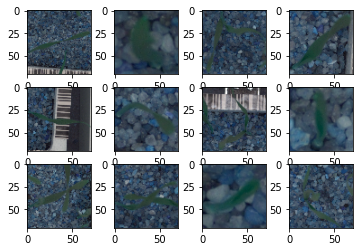

In [ ]:
# Look at some of images
for i in range(12):
  plt.subplot(3,4, i+1)
  plt.imshow(trainImg[i])

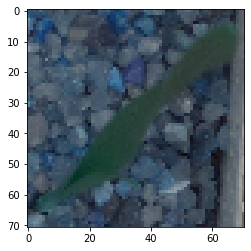

In [ ]:
plt.imshow(trainImg[3])

In [ ]:
# Shape of an image. Since this is color image, so 3 dimensional numpy array/
im = trainImg[3]
im.shape

(71, 71, 3)

In [ ]:
# There are total 5544 images in the training data
trainImgNParray.shape

(5544, 71, 71, 3)

In [ ]:
trainlabel.shape

(5544, 1)

# PREPROCESSING

1.In this step we have used Gaussian kernel.It is done with the function, cv2.GaussianBlur().Gaussian blurring is highly effective in removing Gaussian noise from an image.

2.The HSV color-space is suitable for color detection because with the Hue we
can define the color and the saturation and value will define "different kinds" of the color. (For example it will detect the red, darker red, lighter red too). We cannot do this with the original BGR color space

3.We have perfomed masking  to get the specific part of the image that we are interested in.

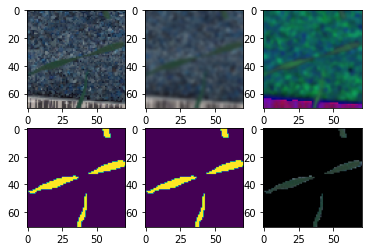

In [ ]:
clearTrainImg = []
examples = []; getEx = True
for img in trainImgNParray:
    # Use gaussian blur
    blurImg = cv2.GaussianBlur(img, (5, 5), 0)   
    
    # Convert to HSV image
    hsvImg = cv2.cvtColor(blurImg, cv2.COLOR_BGR2HSV)  
    
    # Create mask (parameters - green color range)
    lower_green = (25, 40, 50)
    upper_green = (75, 255, 255)
    mask = cv2.inRange(hsvImg, lower_green, upper_green)  
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11, 11))
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    
    # Create bool mask
    bMask = mask > 0  
    
    # Apply the mask
    clear = np.zeros_like(img, np.uint8)  # Create empty image
    clear[bMask] = img[bMask]  # Apply boolean mask to the origin image
    
    clearTrainImg.append(clear)  # Append image without backgroung
    
    # Show examples
    if getEx:
        plt.subplot(2, 3, 1); plt.imshow(img)  # Show the original image
        plt.subplot(2, 3, 2); plt.imshow(blurImg)  # Blur image
        plt.subplot(2, 3, 3); plt.imshow(hsvImg)  # HSV image
        plt.subplot(2, 3, 4); plt.imshow(mask)  # Mask
        plt.subplot(2, 3, 5); plt.imshow(bMask)  # Boolean mask
        plt.subplot(2, 3, 6); plt.imshow(clear)  # Image without background
        getEx = False

clearTrainImg = np.asarray(clearTrainImg)

As the pixel values range from 0 to 256, apart from 0 the range is 255. So dividing all the values by 255 will convert it to range from 0 to


In [ ]:
# normalize the training data
clearTrainImg = clearTrainImg/255

Classes: ['Black-grass' 'Charlock' 'Cleavers' 'Common Chickweed' 'Common wheat'
 'Fat Hen' 'Loose Silky-bent' 'Maize' 'Scentless Mayweed'
 'Shepherd’s Purse' 'Small-flowered Cranesbill' 'Sugar beet']
Number of classes: 12


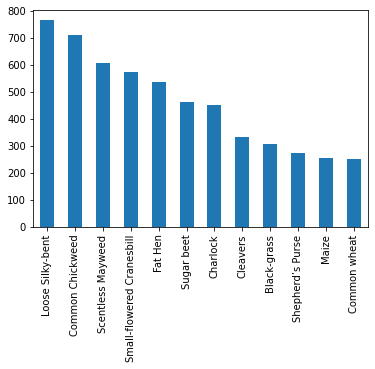

In [ ]:
# Encode labels and create classes
le = preprocessing.LabelEncoder()
le.fit(trainlabel[0])
print("Classes: " + str(le.classes_))
encodeTrainLabels = le.transform(trainlabel[0])

# Make labels categorical
clearTrainLabel = np_utils.to_categorical(encodeTrainLabels)
num_clases = clearTrainLabel.shape[1]
print("Number of classes: " + str(num_clases))

# Plot of label types numbers
trainlabel[0].value_counts().plot(kind='bar')

In [ ]:
# check the data type of the training images
clearTrainImg.dtype

dtype('float64')

Splitting the data into training(90%)and testing(10%)

In [ ]:
from sklearn.model_selection import train_test_split
# I used a 90% - 10% test train split, stratified according to training labels. 
trainX, testX, trainY, testY = train_test_split(clearTrainImg, clearTrainLabel, 
                                                test_size=0.10, random_state=seed, 
                                                stratify = clearTrainLabel)

**Used ImageDatagenerator function for data augmentation which results in amplification of our trainingdata**

In [ ]:

from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
        rotation_range=180,  # randomly rotate images in the range
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally
        height_shift_range=0.1,  # randomly shift images vertically 
        horizontal_flip=True,  # randomly flip images horizontally
        vertical_flip=True  # randomly flip images vertically
    )  
datagen.fit(trainX)

Keras is a neural network Application Programming Interface (API) for Python that is tightly integrated with TensorFlow, which is used to build machine learning models. Keras’ models offer a simple, user-friendly way to define a neural network, which will then be built for you by TensorFlow. 

Keras offers a number of APIs you can use to define your neural network, including:

1.**Sequential API**: which lets you create a model layer by layer for most problems. It’s straightforward (just a simple list of layers), but it’s limited to single-input, single-output stacks of layers.

2.**Functional API**: which is a full-featured API that supports arbitrary model architectures. It’s more flexible and complex than the sequential API.

3.**Model Subclassing**: which lets you implement everything from scratch. Suitable for research and highly complex use cases, but rarely used in practice.

**SEQUENTIAL MODEL**

The Sequential API is a framework for creating models based on instances of the sequential() class. The model has one input variable, a hidden layer with two neurons, and an output layer with one binary output. Additional layers can be created and added to the model.

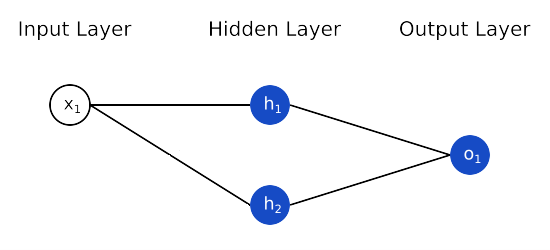

## Model Training

**1.Used sequential model**

**2.Three Input layers**

**3.Used Adam optimizer**

**4.Validating metrics with our accuracy**

**5.We used Dense layer to push more output values to all the neurons.**

In [57]:

model = Sequential() 
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(scaleTo, scaleTo, 3))) 
model.add(layers.MaxPooling2D((2, 2))) # to downsample the feature maps
model.add(layers.Conv2D(64, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Flatten()) 
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(num_clases, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model_A = model
model_A.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 69, 69, 32)        896       
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 34, 34, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 16, 16, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 14, 14, 128)       73856     
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 7, 7, 128)       

**1.Fitting our model** 

**2.With basic set of hyperparater and 10 epochs we are seeing accuracy of 75%. This can further be enhanced by applying different hyperparaters.** 

In [58]:
t0=time.time()
history_A = model_A.fit_generator(datagen.flow(trainX, trainY, batch_size=75), epochs=10, validation_data=(testX, testY), verbose=2)
#history_A = model_A.fit_generator(datagen.flow(trainX, trainY, batch_size=32), epochs=5, validation_data=(testX, testY), verbose=2)
t1=time.time()
print(t1-t0," seconds")

# Final evaluation of the model
scores = model_A.evaluate(testX, testY, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/10


<ipython-input-58-f4ed207b21e6>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history_A = model_A.fit_generator(datagen.flow(trainX, trainY, batch_size=75), epochs=10, validation_data=(testX, testY), verbose=2)


67/67 - 34s - loss: 2.0650 - accuracy: 0.2784 - val_loss: 1.7795 - val_accuracy: 0.3171 - 34s/epoch - 511ms/step
Epoch 2/10
67/67 - 32s - loss: 1.6619 - accuracy: 0.3977 - val_loss: 1.4375 - val_accuracy: 0.4811 - 32s/epoch - 477ms/step
Epoch 3/10
67/67 - 33s - loss: 1.3957 - accuracy: 0.5097 - val_loss: 1.3745 - val_accuracy: 0.5063 - 33s/epoch - 486ms/step
Epoch 4/10
67/67 - 32s - loss: 1.2467 - accuracy: 0.5701 - val_loss: 1.3223 - val_accuracy: 0.5459 - 32s/epoch - 477ms/step
Epoch 5/10
67/67 - 32s - loss: 1.1220 - accuracy: 0.6230 - val_loss: 1.2184 - val_accuracy: 0.5748 - 32s/epoch - 472ms/step
Epoch 6/10
67/67 - 32s - loss: 1.0344 - accuracy: 0.6470 - val_loss: 0.8988 - val_accuracy: 0.6991 - 32s/epoch - 473ms/step
Epoch 7/10
67/67 - 32s - loss: 0.9414 - accuracy: 0.6811 - val_loss: 0.8127 - val_accuracy: 0.7189 - 32s/epoch - 477ms/step
Epoch 8/10
67/67 - 32s - loss: 0.8919 - accuracy: 0.7054 - val_loss: 0.9877 - val_accuracy: 0.6486 - 32s/epoch - 483ms/step
Epoch 9/10
67/67 - 

In [59]:
history_A.history

{'loss': [2.0650014877319336,
  1.6618705987930298,
  1.395721435546875,
  1.246742844581604,
  1.1219831705093384,
  1.0344200134277344,
  0.941380500793457,
  0.8918609023094177,
  0.7850084900856018,
  0.7535627484321594],
 'accuracy': [0.27841252088546753,
  0.39767488837242126,
  0.5097213983535767,
  0.5700541138648987,
  0.6229705214500427,
  0.6470234394073486,
  0.6810984015464783,
  0.7053517699241638,
  0.7378231883049011,
  0.7460412979125977],
 'val_loss': [1.7795034646987915,
  1.4374538660049438,
  1.3744564056396484,
  1.32231605052948,
  1.2184306383132935,
  0.898770272731781,
  0.8127080202102661,
  0.9877367615699768,
  0.6273849606513977,
  0.7254685759544373],
 'val_accuracy': [0.3171171247959137,
  0.4810810685157776,
  0.5063062906265259,
  0.545945942401886,
  0.5747748017311096,
  0.6990991234779358,
  0.7189189195632935,
  0.6486486196517944,
  0.792792797088623,
  0.7441441416740417]}

In [60]:
print(model_A.evaluate(trainX, trainY))  # Evaluate on train set
print(model_A.evaluate(testX, testY))  # Evaluate on test set

156/156 [==============================] - 8s 54ms/step - loss: 0.7263 - accuracy: 0.7507
[0.7263126373291016, 0.7506514191627502]
18/18 [==============================] - 1s 52ms/step - loss: 0.7255 - accuracy: 0.7441
[0.7254685759544373, 0.7441441416740417]


# Hyperparameter Tuning
**Only by changing 2 parameters( batch size=75 and epochs=30) we are able to achieve 91% accuracy. Lets try turning some more parameters**


In [61]:
t0=time.time()
history_A = model_A.fit_generator(datagen.flow(trainX, trainY, batch_size=75), epochs=30, validation_data=(testX, testY), verbose=2)
t1=time.time()
print(t1-t0," seconds")



Epoch 1/30


<ipython-input-61-bc21d4986af9>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history_A = model_A.fit_generator(datagen.flow(trainX, trainY, batch_size=75), epochs=30, validation_data=(testX, testY), verbose=2)


67/67 - 33s - loss: 0.7102 - accuracy: 0.7555 - val_loss: 0.7711 - val_accuracy: 0.7063 - 33s/epoch - 488ms/step
Epoch 2/30
67/67 - 32s - loss: 0.6764 - accuracy: 0.7719 - val_loss: 0.5860 - val_accuracy: 0.8072 - 32s/epoch - 484ms/step
Epoch 3/30
67/67 - 32s - loss: 0.6507 - accuracy: 0.7787 - val_loss: 0.6327 - val_accuracy: 0.7784 - 32s/epoch - 476ms/step
Epoch 4/30
67/67 - 32s - loss: 0.6337 - accuracy: 0.7843 - val_loss: 0.7069 - val_accuracy: 0.7640 - 32s/epoch - 473ms/step
Epoch 5/30
67/67 - 33s - loss: 0.6122 - accuracy: 0.7958 - val_loss: 0.5120 - val_accuracy: 0.8126 - 33s/epoch - 486ms/step
Epoch 6/30
67/67 - 32s - loss: 0.6024 - accuracy: 0.7937 - val_loss: 0.5029 - val_accuracy: 0.8198 - 32s/epoch - 475ms/step
Epoch 7/30
67/67 - 32s - loss: 0.5652 - accuracy: 0.8026 - val_loss: 0.5803 - val_accuracy: 0.7964 - 32s/epoch - 474ms/step
Epoch 8/30
67/67 - 32s - loss: 0.5434 - accuracy: 0.8112 - val_loss: 0.5203 - val_accuracy: 0.8108 - 32s/epoch - 479ms/step
Epoch 9/30
67/67 - 

In [62]:
history_A.history

{'loss': [0.7102218270301819,
  0.676360547542572,
  0.6507470607757568,
  0.6336763501167297,
  0.6122046113014221,
  0.6024140119552612,
  0.5652324557304382,
  0.5433776378631592,
  0.5362256169319153,
  0.5177125334739685,
  0.5210563540458679,
  0.48662644624710083,
  0.505465567111969,
  0.48335370421409607,
  0.4655291438102722,
  0.47495290637016296,
  0.4397478699684143,
  0.45743295550346375,
  0.4407266676425934,
  0.42325639724731445,
  0.411468505859375,
  0.4184444546699524,
  0.38744044303894043,
  0.3991773724555969,
  0.41689926385879517,
  0.3728196620941162,
  0.38295120000839233,
  0.3710736632347107,
  0.3693029284477234,
  0.35460567474365234],
 'accuracy': [0.7554619908332825,
  0.7718981504440308,
  0.7787131667137146,
  0.7843255400657654,
  0.7957506775856018,
  0.7937462329864502,
  0.8025656342506409,
  0.8111845850944519,
  0.8192022442817688,
  0.8161956071853638,
  0.8200039863586426,
  0.8310282826423645,
  0.8268190026283264,
  0.8326317667961121,
  0.8

In [63]:
print(model_A.evaluate(trainX, trainY))  # Evaluate on train set
print(model_A.evaluate(testX, testY))  # Evaluate on test set

156/156 [==============================] - 9s 55ms/step - loss: 0.3141 - accuracy: 0.8888
[0.31413495540618896, 0.8887552618980408]
18/18 [==============================] - 1s 53ms/step - loss: 0.3466 - accuracy: 0.8739
[0.34656330943107605, 0.8738738894462585]


**Lets Try by changing  different optimizer and increasing  more epochs, we were able to get  accuracy of 83%.**

In [64]:
model = Sequential() 
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(scaleTo, scaleTo, 3))) 
model.add(layers.MaxPooling2D((2, 2))) # to downsample the feature maps
model.add(layers.Conv2D(64, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Flatten()) 
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(num_clases, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model_A_tuned = model
model_A_tuned.summary()

t0=time.time()
history_A_tuned = model_A_tuned.fit_generator(datagen.flow(trainX, trainY, batch_size=75), epochs=35, validation_data=(testX, testY), verbose=2)
t1=time.time()
print(t1-t0," seconds")


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 69, 69, 32)        896       
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 34, 34, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 16, 16, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_30 (Conv2D)          (None, 14, 14, 128)       73856     
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 7, 7, 128)       

<ipython-input-64-4838a62fe56f>:19: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history_A_tuned = model_A_tuned.fit_generator(datagen.flow(trainX, trainY, batch_size=75), epochs=35, validation_data=(testX, testY), verbose=2)


67/67 - 33s - loss: 2.0974 - accuracy: 0.2684 - val_loss: 1.7478 - val_accuracy: 0.3712 - 33s/epoch - 492ms/step
Epoch 2/35
67/67 - 33s - loss: 1.7443 - accuracy: 0.3784 - val_loss: 1.7380 - val_accuracy: 0.3982 - 33s/epoch - 487ms/step
Epoch 3/35
67/67 - 32s - loss: 1.5325 - accuracy: 0.4616 - val_loss: 1.3301 - val_accuracy: 0.5207 - 32s/epoch - 477ms/step
Epoch 4/35
67/67 - 32s - loss: 1.4271 - accuracy: 0.5049 - val_loss: 1.1798 - val_accuracy: 0.5802 - 32s/epoch - 475ms/step
Epoch 5/35
67/67 - 32s - loss: 1.2847 - accuracy: 0.5646 - val_loss: 0.9931 - val_accuracy: 0.6541 - 32s/epoch - 476ms/step
Epoch 6/35
67/67 - 33s - loss: 1.1435 - accuracy: 0.6113 - val_loss: 0.9591 - val_accuracy: 0.6505 - 33s/epoch - 487ms/step
Epoch 7/35
67/67 - 32s - loss: 1.0548 - accuracy: 0.6472 - val_loss: 1.0533 - val_accuracy: 0.6649 - 32s/epoch - 477ms/step
Epoch 8/35
67/67 - 32s - loss: 0.9938 - accuracy: 0.6663 - val_loss: 0.8634 - val_accuracy: 0.7081 - 32s/epoch - 474ms/step
Epoch 9/35
67/67 - 

## Model evaluation and Results

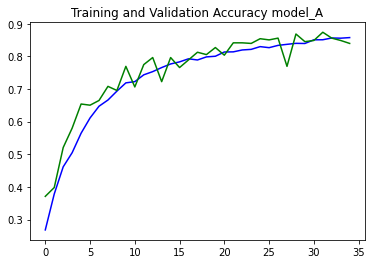

In [65]:
# plot training accuracies
plt.plot(history_A_tuned.history['accuracy'],'b') #train acc
plt.plot(history_A_tuned.history['val_accuracy'],'g') #val acc
plt.title('Training and Validation Accuracy model_A') 
plt.show()

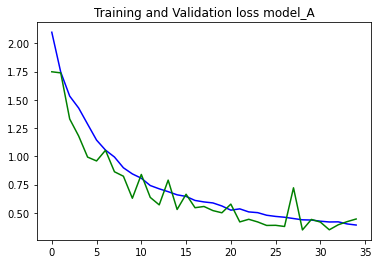

In [66]:
# plot training and validation loss
plt.plot(history_A_tuned.history['loss'],'b') #train loss
plt.plot(history_A_tuned.history['val_loss'],'g') #val loss
plt.title('Training and Validation loss model_A') 
plt.show()

**MODEL PREDICTION/CONFUSION MATRIX**

In [67]:
# PREDICTIONS
y_pred = model_A_tuned.predict(testX)
y_class = np.argmax(y_pred, axis = 1) 
y_check = np.argmax(testY, axis = 1) 
cmatrix = confusion_matrix(y_check, y_class)
print(cmatrix)

18/18 [==============================] - 1s 53ms/step
[[ 1  0  0  0  0  0 30  0  0  0  0  0]
 [ 0 44  0  0  0  0  0  0  0  1  0  0]
 [ 0  0 32  0  0  0  0  0  1  0  1  0]
 [ 0  0  0 70  0  0  0  1  0  0  0  0]
 [ 3  0  2  0 13  0  7  0  0  0  0  0]
 [ 0  1  0  8  0 40  1  3  0  0  0  1]
 [ 3  0  0  0  0  0 74  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 24  1  0  0  1]
 [ 0  2  1  5  0  0  2  1 49  0  0  1]
 [ 0  0  0  5  0  0  0  0  1 20  0  1]
 [ 0  0  0  1  0  0  1  0  0  1 55  0]
 [ 0  0  0  0  0  0  0  1  1  0  0 44]]


## Conclusion and Future Work:
 1.Implemented CNN model using Keras library .The data implemented in this model is plant seedling classification.

2.CNN is used to identify, scaling, translation and other forms of images. This project is plant seedlings classification. 

3.While doing this project we come to know about various concepts like deep learning, machine learning, CNN i.e. convolution neural network etc. 

4.The code had been successfully implemented using CNN in Colab.

5.We also come to know about how plant seedlings are classified using various machine learning tools specially CNN. 

6.We have preprocessed the images by burring,converting to HSV and masking them to the optimize the images.

7.By using Sequential() from keras library we tried various settings of epochs, optimizers, and batch sizes. 

8.Hyperparameter tuning has been done further to enhance by applying grid search. And more paramters can be tried.

9.We have got best accuracy score 91% with batch size =75,epochs=30 and optimizer = 'Adam'

10.We have tried with 'rmsprop' optimizer and got 83% accuracy with it.

11.Since data size is huge, model parallelization would help or running on GPU server.

12.In future works, we can detect disease on identified plant seedling. We can classify herbal plants. 

13.To increase understanding of details of target object, further research is needed. 

14.Another dimension is to perform new experiments when more public datasets become available.

